# Employee Turnover Analytics

## Library Import & Data Loading

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\003\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_excel('\\Users\\003\\Desktop\\CalTech AI\\4 - Machine Learning\\Assessments - Machine Learning\\Assessment - Employee Turnover Analytics\\1688640705_hr_comma_sep.xlsx')

In [ ]:
# Create a directory for saving plots and reports
if not os.path.exists('Employee Turnover Model Evaluation'):
    os.makedirs('Employee Turnover Model Evaluation')

In [5]:
from copy import deepcopy

df_copy = deepcopy(df)

## Data Inspection & Quality

In [6]:
def inspect_data(df):
    """
    Perform a comprehensive inspection of the loaded data.

    Parameters:
        df (DataFrame): The input DataFrame to be inspected.

    Returns:
        None

    Example usage:
        # Load data into a DataFrame (replace 'data.csv' with your data file)
        df = pd.read_csv('data.csv')

        # Perform a comprehensive inspection of the loaded data
        inspect_data(df)
    """
    print("Data Inspection Report:")
    print("-----------------------")
    
    # 1. Basic Information
    print("\n1. Basic Information:")
    display(df.head())
    display(df.tail())
    print(df.info())

    # 2. Summary Statistics
    print("\n2. Summary Statistics:")
    numerical_df = df.select_dtypes(include=np.number)
    summary_stats = numerical_df.describe(include='all').T
    mode_values = numerical_df.mode().T
    median_values = numerical_df.median().T
    variance_values = numerical_df.var().T
    summary_stats['mode'] = mode_values[0]
    summary_stats['median'] = median_values
    summary_stats['variance'] = variance_values
    display(summary_stats)
    print("\n2. 'Object' Summary Statistics:")
    display(df.describe(include=['O']))

    
    # 3A. Missing Values
    print("\n3A. Missing Values:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found.")
    else:
        display(missing_values)
    
    # 3B. Zeroes
    print("\n3B. Zero Values:")
    zero_values = (df == 0).sum(axis=0)
    if zero_values.sum() > 0:
        print("\nTotal Rows with Zero Values:")
        display((df == 0).sum(axis=0))
        print("\nPercent of Zeroes:")
        display((df == 0).sum(axis=0)/df.shape[0]*100)
    else:
        print("No zero values found.")

    # 4. Duplicate Rows
    print("\n4. Duplicate Rows:")
    num_duplicates = df.duplicated().sum()
    if num_duplicates == 0:
        print("No duplicate rows found.")
    else:
        print(f"Number of duplicate rows: {num_duplicates}")
    
    # 5. Outliers
    print("\n5. Outliers:")
    numerical_cols = df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()
    
    # 6. Data Distribution
    print("\n6. Data Distribution:")
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution of {col}")
        plt.show()

Data Inspection Report:
-----------------------

1. Basic Information:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

2. Summary Statistics:


,count,mean,std,min,25%,50%,75%,max,mode,median,variance
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0,0.10,0.64,0.061817
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0,0.55,0.72,0.029299
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0,4.00,4.00,1.519284
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0,135.00,200.00,2494.313175
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0,3.00,3.00,2.131998
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.123706
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.181411
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.020817



2. 'Object' Summary Statistics:


,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316



3A. Missing Values:
No missing values found.

3B. Zero Values:

Total Rows with Zero Values:


satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident            12830
left                     11428
promotion_last_5years    14680
sales                        0
salary                       0
dtype: int64


Percent of Zeroes:


satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.000000
Work_accident            85.539036
left                     76.191746
promotion_last_5years    97.873192
sales                     0.000000
salary                    0.000000
dtype: float64


4. Duplicate Rows:
Number of duplicate rows: 3008

5. Outliers:


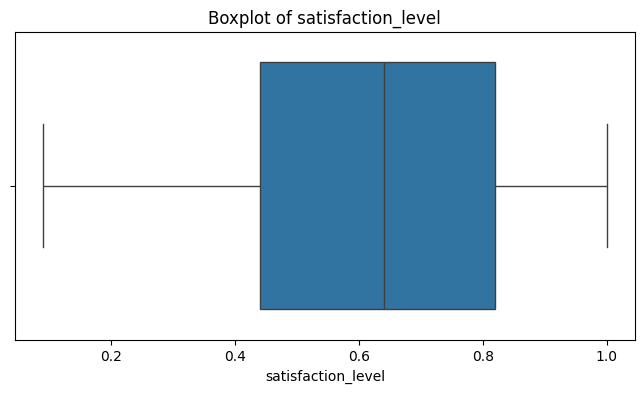

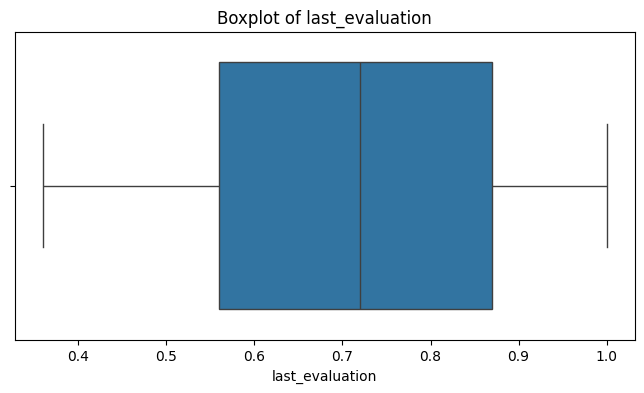

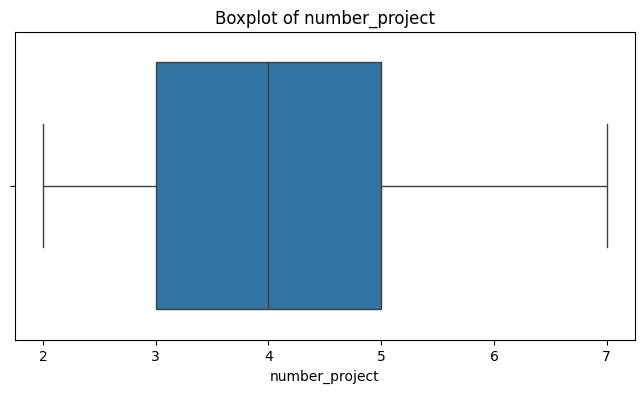

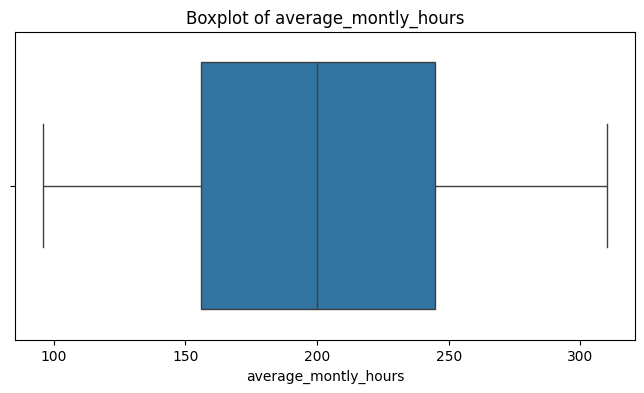

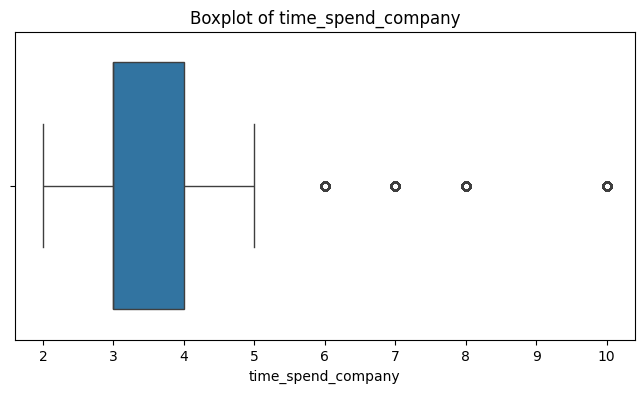

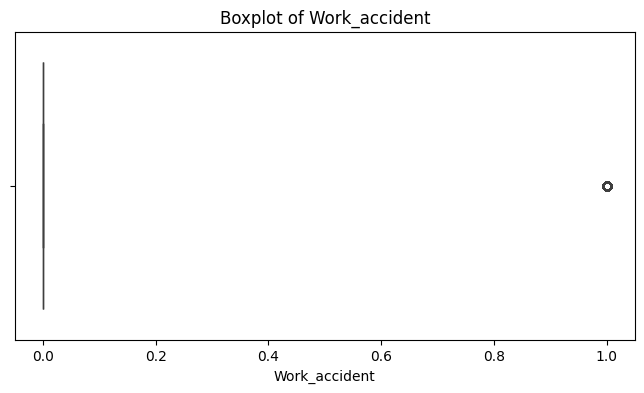

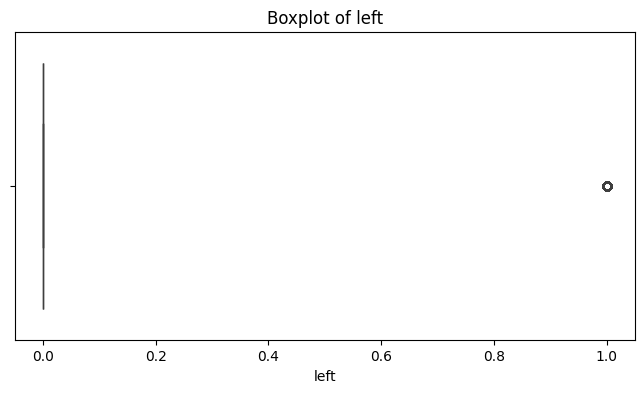

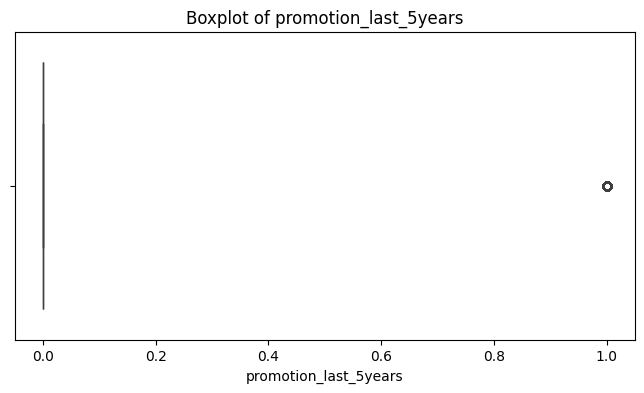


6. Data Distribution:


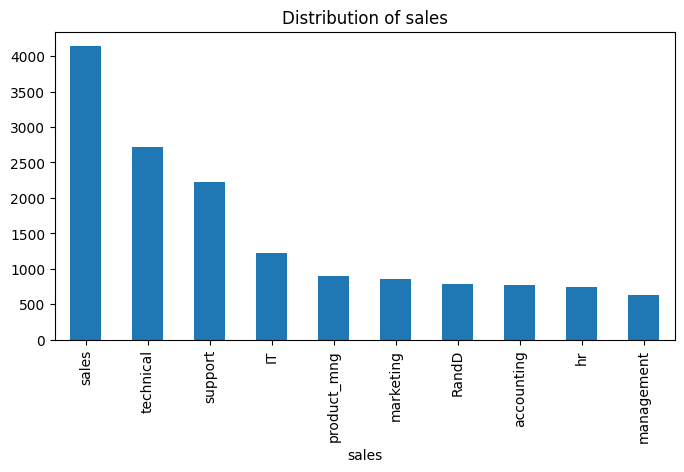

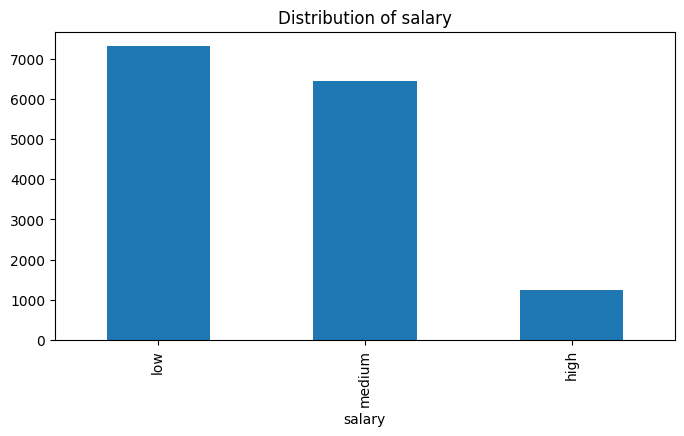

In [7]:
inspect_data(df)

## Exploratory Data Analysis

### HeatMap of Correlation Matrix

<Axes: >

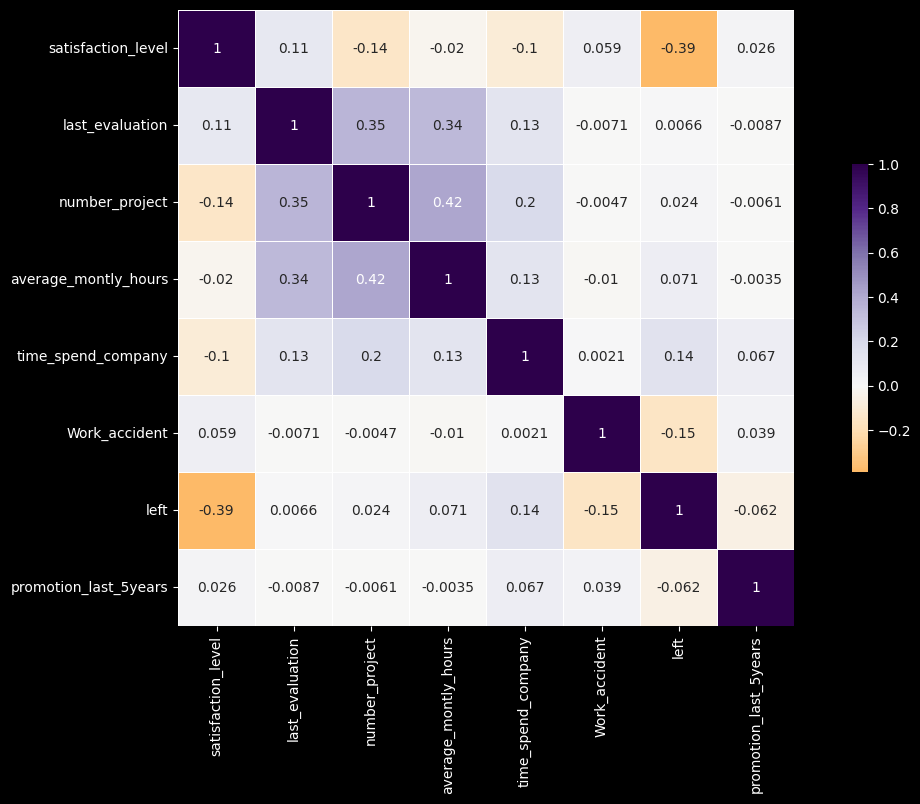

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
numerical_df = df.corr(numeric_only=True)
sns.heatmap(numerical_df, cmap='PuOr', vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Univariate Analysis: Distribution

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

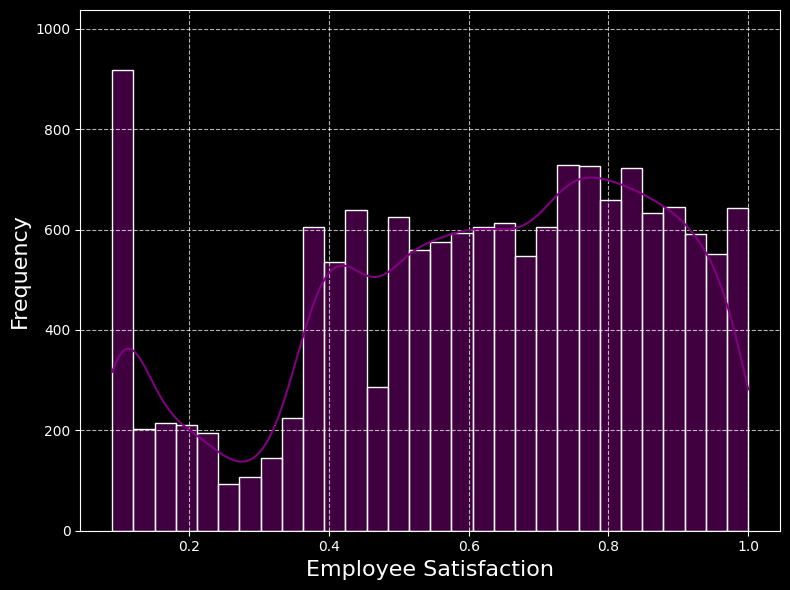

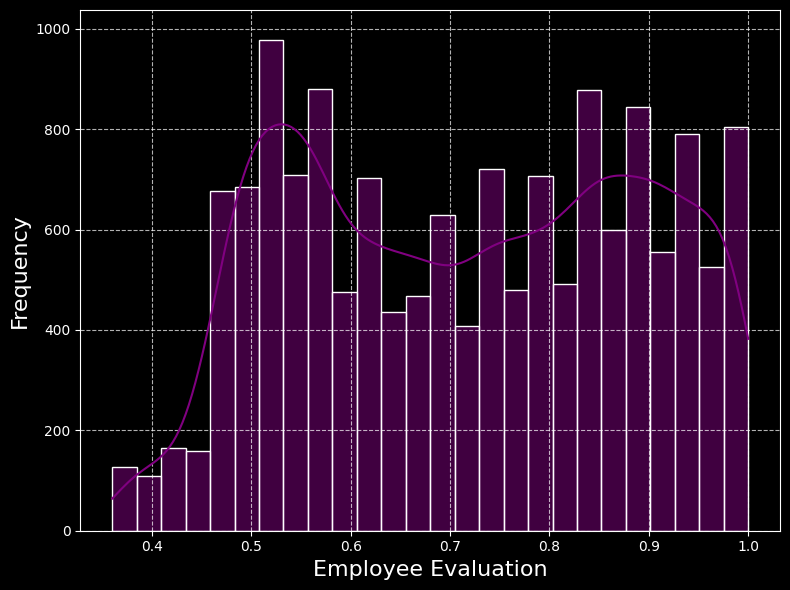

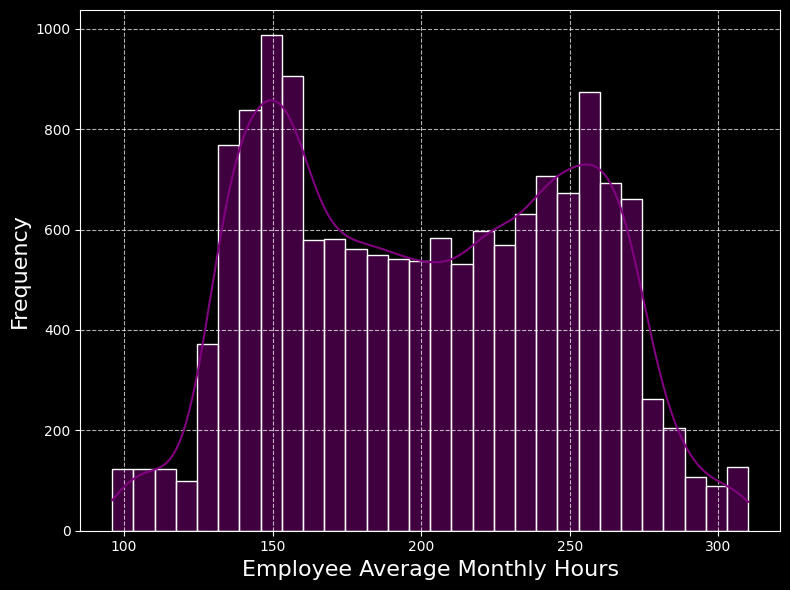

In [10]:
# Set the aesthetic style of the plots
plt.style.use('dark_background')

# Define feature names and titles
features = [
    ('Employee Satisfaction', 'satisfaction_level'),
    ('Employee Evaluation', 'last_evaluation'),
    ('Employee Average Monthly Hours', 'average_montly_hours')
]
# Create a list to store the y-axis limits
y_limits = []

# First pass to determine y-axis limits
for xlabel, feature in features:
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(df[feature], kde=True, color='purple')
    ax.set_title(xlabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Store y-axis limit
    y_limits.append(ax.get_ylim())
    plt.close()

# Determine uniform y-axis limits
y_min = min(limit[0] for limit in y_limits)
y_max = max(limit[1] for limit in y_limits)
uniform_ylim = (y_min, y_max)

# Second pass to plot with uniform y-axis limits
for xlabel, feature,  in features:
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(df[feature], kde=True, color='purple')
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_ylim(uniform_ylim)  # Set uniform y-axis limit
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Bivariate Analysis: # of Projects vs. Left

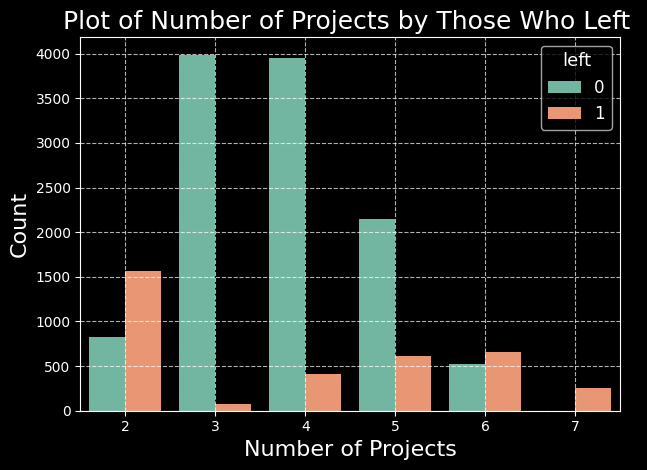

In [11]:
plt.style.use('dark_background')
sns.countplot(data=df, x='number_project', hue='left', palette='Set2')
plt.title('Plot of Number of Projects by Those Who Left ', fontsize=18)
plt.xlabel('Number of Projects', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title='left', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

> Those who tended to stay had the largest ratio at 3 number of projects with the ratio declining with increasing rapidity until more leave at 6 and above. More tend to leave also when they are below 3 projects

## K-Means Clustering

In [12]:
from sklearn.cluster import KMeans

### Filter Dataframe

In [13]:
print("***Breakdown of 'left' Feature:***")
print(df['left'].value_counts())

#Filter on only those who left and save to dataframe
left1_filter = df[df['left']==1]
print("\n\n***Confirmed Filter on Those Who Left:***\n")
display(left1_filter.info())

***Breakdown of 'left' Feature:***
left
0    11428
1     3571
Name: count, dtype: int64


***Confirmed Filter on Those Who Left:***

<class 'pandas.core.frame.DataFrame'>
Index: 3571 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3571 non-null   float64
 1   last_evaluation        3571 non-null   float64
 2   number_project         3571 non-null   int64  
 3   average_montly_hours   3571 non-null   int64  
 4   time_spend_company     3571 non-null   int64  
 5   Work_accident          3571 non-null   int64  
 6   left                   3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   sales                  3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 306.9+ KB


None

### Build K-Means Clusters (Centroid-Based Clustering)

##### Define our KMeans Functions with 3 clusters

In [14]:
kmeans_model = KMeans(n_clusters=3, random_state=28)

#### Fit & Predict Dataset on Satisfaction Level and Last Evaluation Features, Adding Clusters to Dataframe

In [15]:
left1_filter['Cluster'] = kmeans_model.fit_predict(left1_filter[['satisfaction_level', 'last_evaluation']]) 

C:\Users\003\AppData\Local\Temp\ipykernel_5384\2189433105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left1_filter['Cluster'] = kmeans_model.fit_predict(left1_filter[['satisfaction_level', 'last_evaluation']])


#### Confirm Cluster Added

In [16]:
display(left1_filter.head())
print("\n ***Check Breakdown of Clusters:***")
display(left1_filter['Cluster'].value_counts())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1



 ***Check Breakdown of Clusters:***


Cluster
1    1650
0     977
2     944
Name: count, dtype: int64

#### Visualize the Clusters & Centroids  

##### Determine and Define Centroids

In [17]:
centroids = kmeans_model.cluster_centers_
cent_x = centroids[:,0]
cent_y = centroids[:,1]
print('centroids x:', cent_x, '\ncentroids y:',cent_y)

centroids x: [0.80851586 0.41014545 0.11115466] 
centroids y: [0.91170931 0.51698182 0.86930085]


##### Map Centroid X, Y, and Color to Dataframe

In [18]:
left1_filter['CentX'] = left1_filter['Cluster'].map({0:cent_x[0],
                                1:cent_x[1],
                                2:cent_x[2]})

left1_filter['CentY'] = left1_filter['Cluster'].map({0:cent_y[0],
                                1:cent_y[1],
                                2:cent_y[2]})
color_list = ['#ff52bf', '#52f3ff', '#d9ff52']
left1_filter['ClusterColor'] = left1_filter['Cluster'].map({0:color_list[0],
                                        1:color_list[1],
                                        2:color_list[2]})

left1_filter.head(10)

C:\Users\003\AppData\Local\Temp\ipykernel_5384\2480963320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left1_filter['CentX'] = left1_filter['Cluster'].map({0:cent_x[0],
C:\Users\003\AppData\Local\Temp\ipykernel_5384\2480963320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left1_filter['CentY'] = left1_filter['Cluster'].map({0:cent_y[0],
C:\Users\003\AppData\Local\Temp\ipykernel_5384\2480963320.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Cluster,CentX,CentY,ClusterColor
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0.410145,0.516982,#52f3ff
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0.808516,0.911709,#ff52bf
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2,0.111155,0.869301,#d9ff52
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0.808516,0.911709,#ff52bf
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0.410145,0.516982,#52f3ff
5,0.41,0.50,2,153,3,0,1,0,sales,low,1,0.410145,0.516982,#52f3ff
6,0.10,0.77,6,247,4,0,1,0,sales,low,2,0.111155,0.869301,#d9ff52
7,0.92,0.85,5,259,5,0,1,0,sales,low,0,0.808516,0.911709,#ff52bf
8,0.89,1.00,5,224,5,0,1,0,sales,low,0,0.808516,0.911709,#ff52bf
9,0.42,0.53,2,142,3,0,1,0,sales,low,1,0.410145,0.516982,#52f3ff


#### Plot Clusters & Centroids

Text(0, 0.5, 'Employee Evaluation Score')

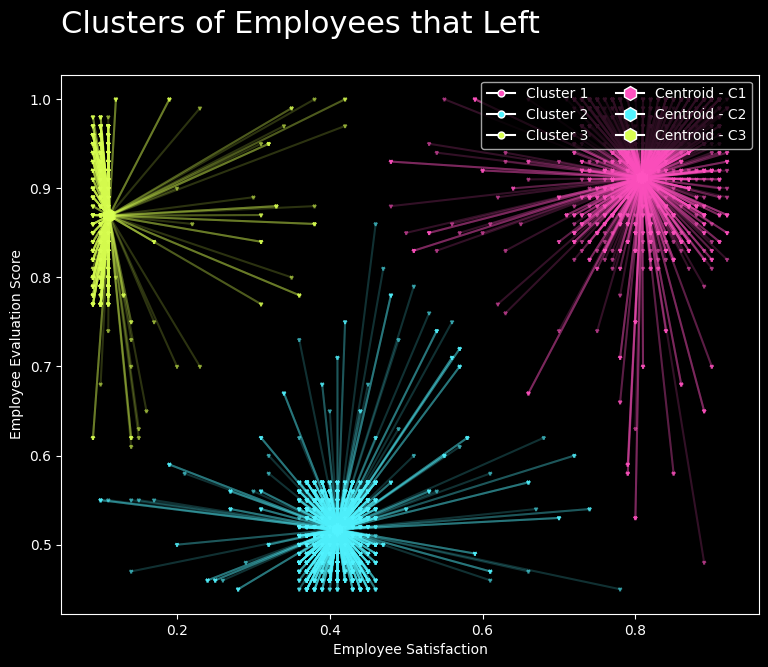

In [19]:
from matplotlib.lines import Line2D

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(9, 7))

# Scatter plot for data points and centroids,respectively
plt.scatter(left1_filter['satisfaction_level'], left1_filter['last_evaluation'], c=left1_filter['ClusterColor'], alpha=0.6, s=10, marker='1')
plt.scatter(cent_x, cent_y, marker='h', c=color_list, s=90)

# Draw lines from each point to its respective centroid
for _, row in left1_filter.iterrows():
    plt.plot([row.satisfaction_level, row.CentX], [row.last_evaluation, row.CentY], c=row['ClusterColor'], alpha=0.2)

# Create legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', markerfacecolor=color, markersize=5)
    for i, color in enumerate(color_list)
]
legend_elements += [
    Line2D([0], [0], marker='h', color='w', label=f'Centroid - C{i+1}', markerfacecolor=color, markersize=10)
    for i, color in enumerate(color_list)
]

# Add legend, title, and labels to the plot
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
plt.title('Clusters of Employees that Left\n', loc='left', fontsize=22)
plt.xlabel('Employee Satisfaction')
plt.ylabel('Employee Evaluation Score')

In [20]:
# Group by the 'Cluster' column
kmeans_3clusters_df = left1_filter.groupby('Cluster').agg(
    Count=('Cluster', 'size'),
    Employee_Satisfaction=('satisfaction_level', 'mean'),
    Employee_Evaluation_Score=('last_evaluation', 'mean')
)
display(round(kmeans_3clusters_df, ndigits=3))

,Count,Employee_Satisfaction,Employee_Evaluation_Score
Cluster,,,
0,977,0.809,0.912
1,1650,0.410,0.517
2,944,0.111,0.869


> There appears to be 3 Clusters
- Cluster 1: Those who had what appears to be a high average Employee Satisfacton (0.809) and a high average Employee Evaluation Score (0.912)
- Cluster 2: Those who had what appears to be in the middle of both Employee Satisfaction (0.410) and Employee Evaluation Score (0.517)
- Cluster 3: Those who had what appears to be a low average Employee Satisfaction (0.111) and a high average Employee Evaluation Score (0.869)

## Data Pre-Processing

### Categorical Encoding

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [24]:
categorical_df = df.select_dtypes(include='object')
dummies = pd.get_dummies(categorical_df, drop_first=True)
dummies = dummies.astype(int)
df = pd.concat([df.drop(categorical_df, axis=1), dummies], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_RandD            14999 non-null  int32  
 9   sales_accounting       14999 non-null  int32  
 10  sales_hr               14999 non-null  int32  
 11  sales_management       14999 non-null  int32  
 12  sales_marketing        14999 non-null  int32  
 13  sales_product_mng      14999 non-null  int32  
 14  sales_sales            14999 non-null  int32  
 15  sa

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

### Imbalance Check (Ratio)

<Axes: ylabel='left'>

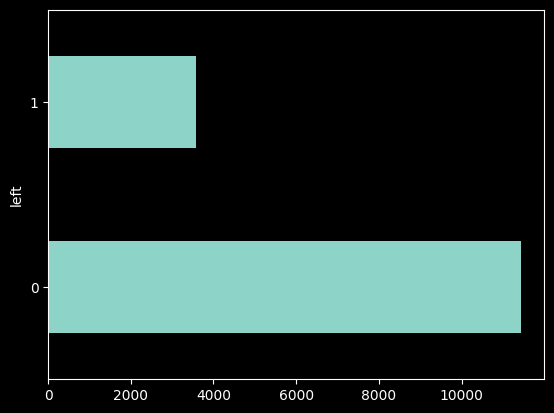

In [27]:
y.value_counts().plot(kind='barh')

In [28]:
y_train.value_counts(normalize=True)*100

left
0    76.189682
1    23.810318
Name: proportion, dtype: float64

### Apply SMOTE to Fix Imbalance

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote_model = SMOTE()
X_train_smote, y_train_smote = smote_model.fit_resample(X_train, y_train)

Check Plot to Confirm

<Axes: ylabel='left'>

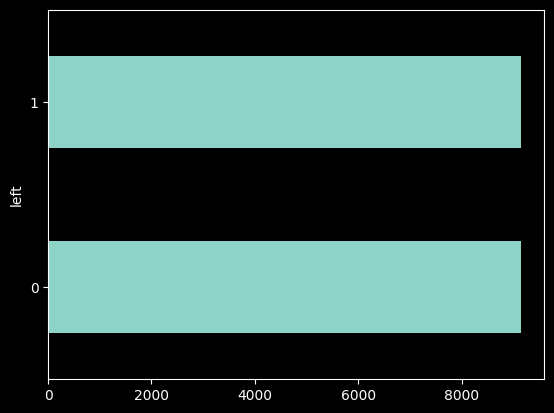

In [31]:
y_train_smote.value_counts().plot(kind='barh')

## Model Training & Evaluation

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import label_binarize

### Define Stratified K Fold Cross Validation for Gradient Boosting

In [33]:
kfold_s = StratifiedKFold(n_splits=5, random_state=28, shuffle=True)

### Define the Model

In [34]:
models = {
    'LogReg': LogisticRegression(), 
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100)
}

### Automate Training, Cross-Validation, Plotting

C:\Users\003\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\003\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

LogReg: AUC-ROC = 0.8426301307631204
RandomForest: AUC-ROC = 0.9975568093792867
GradientBoosting: AUC-ROC = 0.9913976130802079


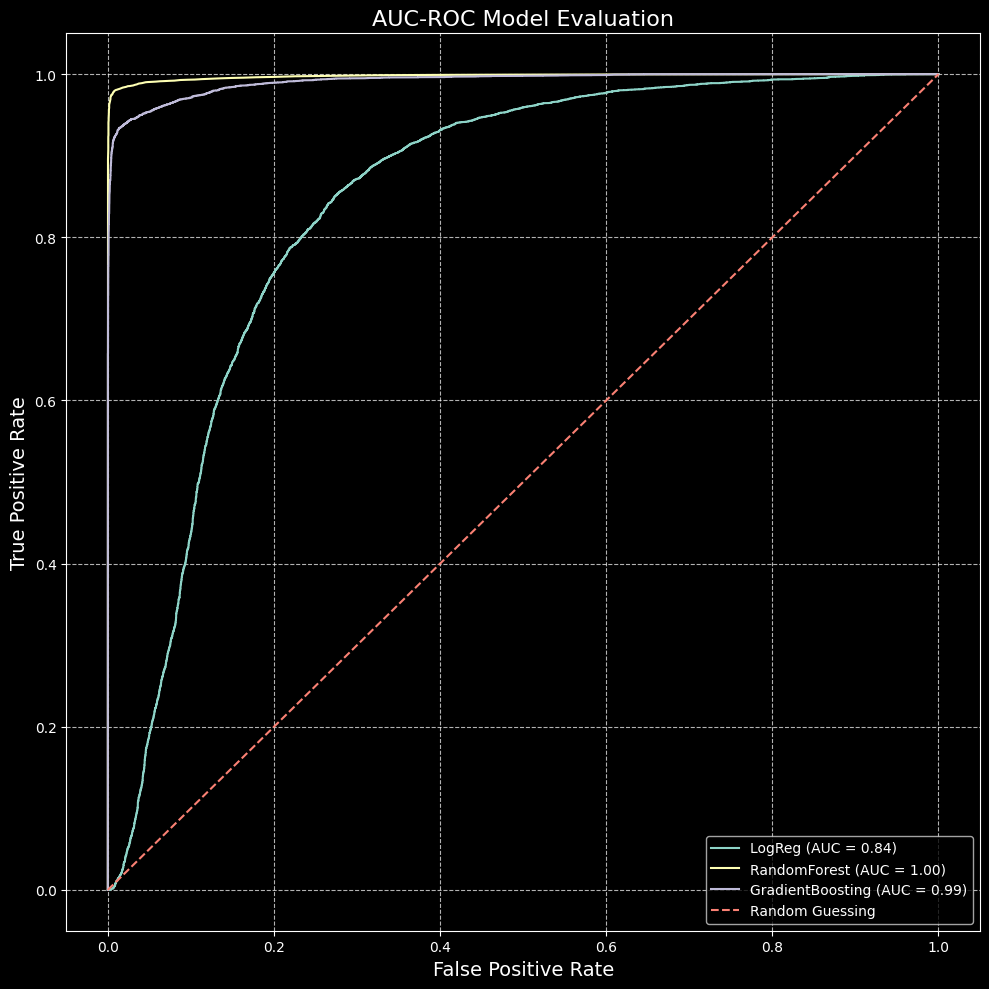

In [35]:
# Create a directory for saving plots and reports
if not os.path.exists('model_evaluations'):
    os.makedirs('model_evaluations')

plt.figure(figsize=(10,10))
for name, model in models.items():
    #cross validation predictions, return the probability scores
    y_pred_proba = cross_val_predict(model, X_train_smote, y_train_smote, cv=kfold_s, method='predict_proba')[:,1]

    #calculate the auc score and curve
    auc = roc_auc_score(y_train_smote, y_pred_proba)
    print(f'{name}: AUC-ROC = {auc}') #print the score of the outcome

    # false positive rate and true positive rate
    fpr, tpr, thresh = roc_curve(y_train_smote, y_pred_proba)

    #build the plot for each curve,
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})') #x=fpr, y=tpr, label is the name with AUC value

#add the diagonal line
plt.plot([0,1], [0,1], linestyle='--', label='Random Guessing')
# Add plot details
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('AUC-ROC Model Evaluation', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save ROC curve plot
plt.savefig('model_evaluations/roc_curve_plot.png', dpi=300)
plt.show()

C:\Users\003\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\003\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

<Figure size 1000x1000 with 0 Axes>

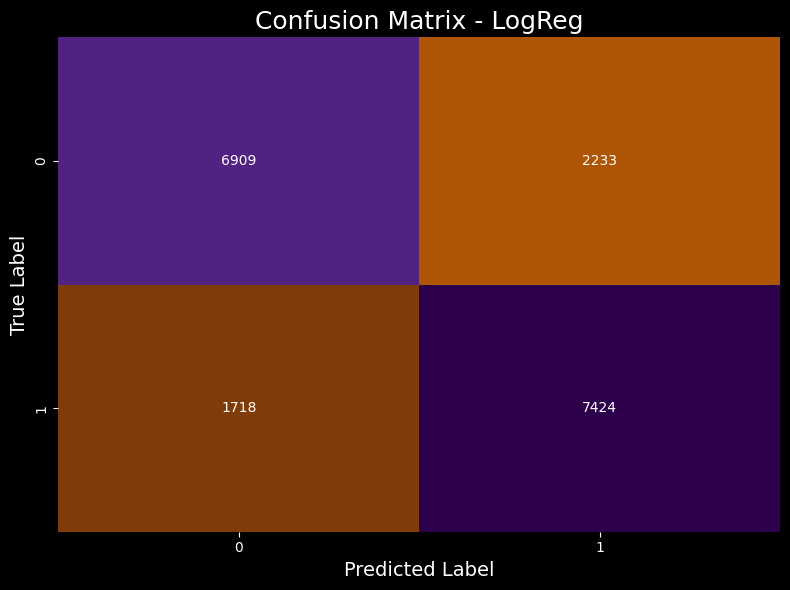

Classification Report:
              precision  recall  f1-score    support
0                 0.801   0.756     0.778   9142.000
1                 0.769   0.812     0.790   9142.000
accuracy          0.784   0.784     0.784      0.784
macro avg         0.785   0.784     0.784  18284.000
weighted avg      0.785   0.784     0.784  18284.000


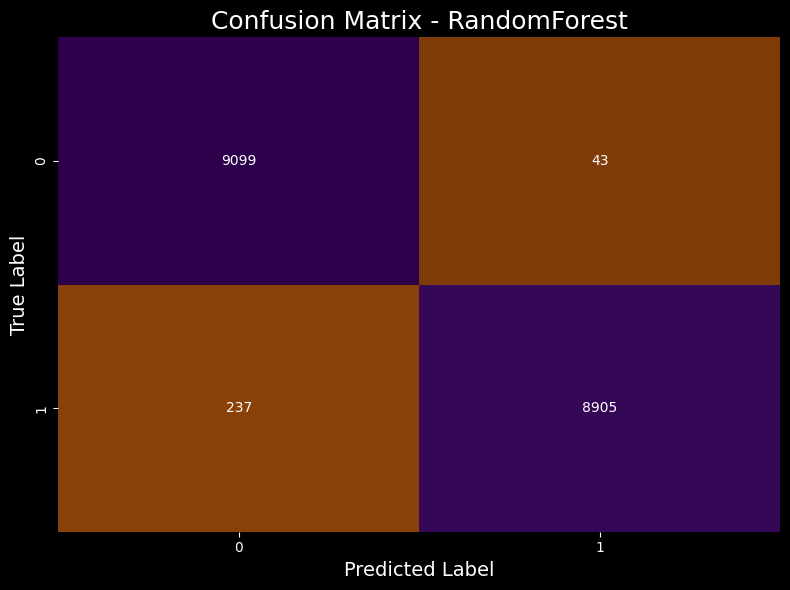

Classification Report:
              precision  recall  f1-score    support
0                 0.975   0.995     0.985   9142.000
1                 0.995   0.974     0.985   9142.000
accuracy          0.985   0.985     0.985      0.985
macro avg         0.985   0.985     0.985  18284.000
weighted avg      0.985   0.985     0.985  18284.000


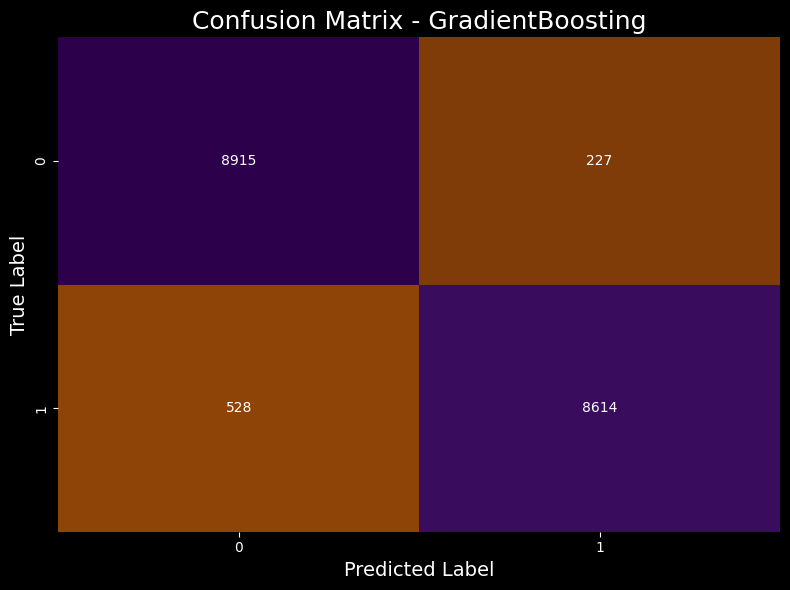

Classification Report:
              precision  recall  f1-score    support
0                 0.944   0.975     0.959   9142.000
1                 0.974   0.942     0.958   9142.000
accuracy          0.959   0.959     0.959      0.959
macro avg         0.959   0.959     0.959  18284.000
weighted avg      0.959   0.959     0.959  18284.000


In [36]:
# Create a directory for saving plots and reports
if not os.path.exists('model_evaluations'):
    os.makedirs('model_evaluations')

plt.figure(figsize=(10,10))
for name, model in models.items():    
    # Compute confusion matrix for the full dataset
    y_pred = cross_val_predict(model, X_train_smote, y_train_smote, cv=kfold_s, method='predict')
    cm = confusion_matrix(y_train_smote, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuOr', cbar=False,
                xticklabels=np.unique(y_train_smote), yticklabels=np.unique(y_train_smote))
    plt.title(f'Confusion Matrix - {name}', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.tight_layout()
 
    # Save confusion matrix
    plt.savefig(f'model_evaluations/{name}_confusion_matrix.png', dpi=300)
    plt.show()

    # Convert classification report to DataFrame
    report = classification_report(y_train_smote, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print("Classification Report:")
    print(round(report_df, ndigits=3))

    # Save classification report
    report_df.to_csv(f'model_evaluations/{name}_classification_report.csv')

> Recall is favored over precision as we favor a high true positive rate, meaning that a false negative (predicting that they will not leave) when they actually are very likely to leave can be more problematic. 

> Given this, we will proceed with the **Random Forest Classifier**

## Predict on Test Data

In [38]:
# Define the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100)

# Fit the Random Forest model
model_rf.fit(X_train_smote, y_train_smote)

# Predict probability scores on test data
y_pred_proba = model_rf.predict_proba(X_test)[:, 1] # Probability of the positive class

# Define a function to categorize probabilities
def categorize_probability(prob):
    if prob < 0.20:
        return 1
    elif 0.20 <= prob < 0.60:
        return 2
    elif 0.60 <= prob < 0.90:
        return 3
    else:
        return 4

# Apply categorization function to the probability scores
Risk_Zone = [categorize_probability(prob) for prob in y_pred_proba]

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Predicted_Probability': y_pred_proba,
    'Risk_Zone': Risk_Zone
})

# Combine the test data with results
X_test_Risk_Zone = X_test.copy()  # Assuming X_test is a DataFrame
X_test_Risk_Zone['Predicted_Probability'] = y_pred_proba
X_test_Risk_Zone['Risk_Zone'] = Risk_Zone

# Save the DataFrame with results
X_test_Risk_Zone.to_csv('model_evaluations/X_test_Risk_Zone.csv', index=False)

# Display the first few rows of the resulting DataFrame
display(X_test_Risk_Zone.info())
display(X_test_Risk_Zone.head(10))


<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 10627 to 731
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3000 non-null   float64
 1   last_evaluation        3000 non-null   float64
 2   number_project         3000 non-null   int64  
 3   average_montly_hours   3000 non-null   int64  
 4   time_spend_company     3000 non-null   int64  
 5   Work_accident          3000 non-null   int64  
 6   promotion_last_5years  3000 non-null   int64  
 7   sales_RandD            3000 non-null   int32  
 8   sales_accounting       3000 non-null   int32  
 9   sales_hr               3000 non-null   int32  
 10  sales_management       3000 non-null   int32  
 11  sales_marketing        3000 non-null   int32  
 12  sales_product_mng      3000 non-null   int32  
 13  sales_sales            3000 non-null   int32  
 14  sales_support          3000 non-null   int32  
 15  sales_

None

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,Predicted_Probability,Risk_Zone
10627,0.98,0.77,3,191,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0.01,1
2703,0.76,0.93,3,271,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0.80,3
6059,0.70,0.93,3,185,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0.14,1
3258,0.48,0.61,3,223,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0.00,1
4565,0.57,0.90,3,144,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0.06,1
4991,0.79,0.82,3,98,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0.01,1
13976,0.92,0.64,4,190,10,1,0,0,0,0,1,0,0,0,0,0,1,0,0.00,1
9427,0.98,0.54,4,178,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0.00,1
7173,1.00,0.61,5,264,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0.00,1
13412,0.53,0.64,3,143,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0.00,1


# Investigating Retention Strategies:

## Model Feature Importances

In [39]:
# Obtain model feature importances
importances = model_rf.feature_importances_
# Create sorted dataframe with column labels
features = X_test.columns #column labels
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False) #Sort
display(feature_importances)

,Feature,Importance
0,satisfaction_level,0.267623
4,time_spend_company,0.234666
3,average_montly_hours,0.162953
2,number_project,0.143171
1,last_evaluation,0.131670
5,Work_accident,0.020752
16,salary_low,0.007024
17,salary_medium,0.004745
13,sales_sales,0.004736
15,sales_technical,0.004310


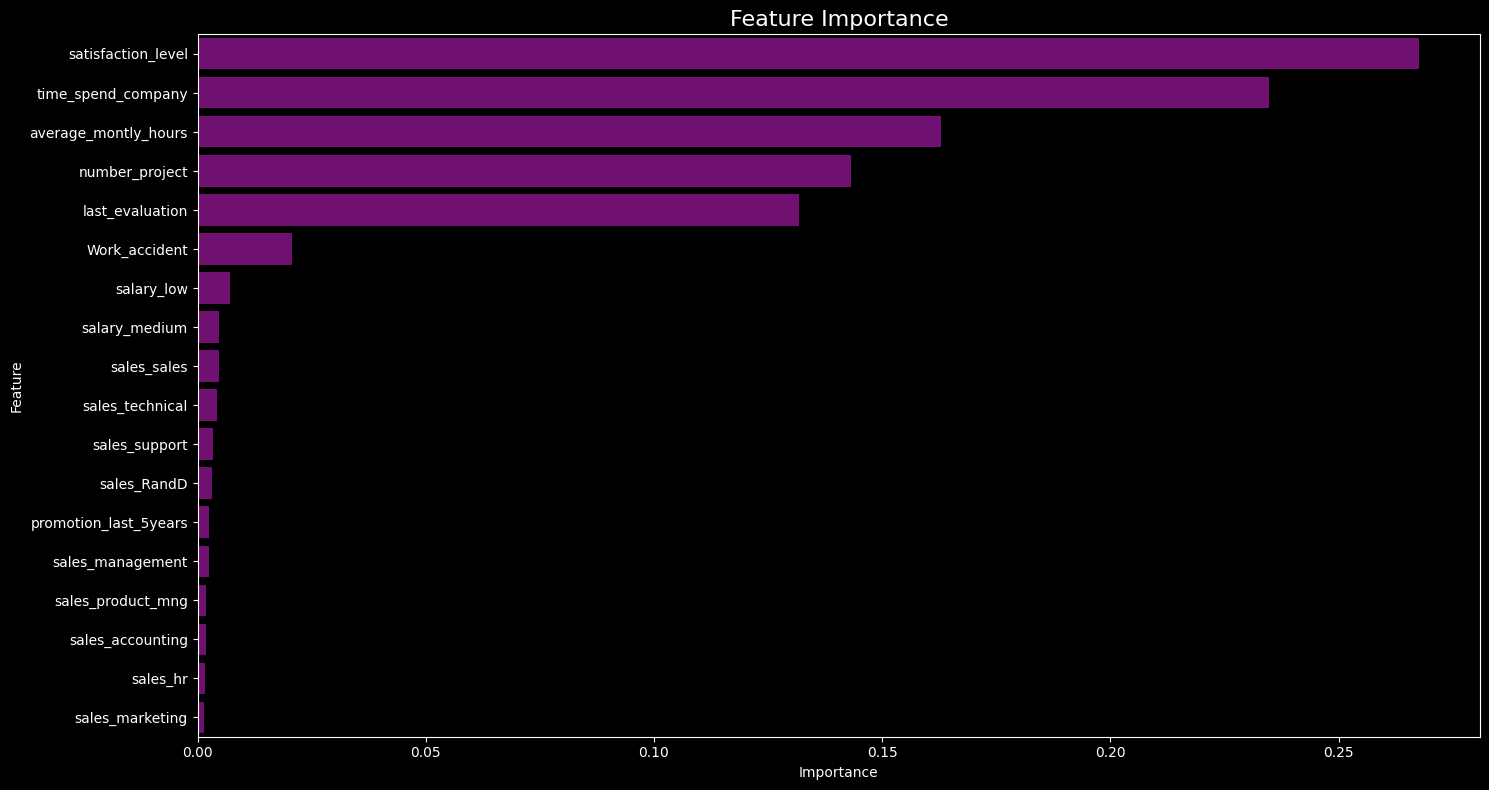

In [40]:
#Plot in order
plt.figure(figsize=(15, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', color='purple')
plt.title('Feature Importance', fontsize=16)
plt.tight_layout()
plt.savefig('model_evaluations/feature_importance.png', dpi=300)
plt.show()

## SHAP Summary Plot on Not Leaving (0) and Leaving (1)

In [41]:
from sklearn import metrics
import shap

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_smote, y_train_smote)
random_forest_preds = random_forest.predict(X_test)
print('The accuracy of the Random Forests model is :\t', metrics.accuracy_score(random_forest_preds, y_test))

C:\Users\003\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The accuracy of the Random Forests model is :	 0.9886666666666667


In [42]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)

In [43]:
print("Shape of df: ", X_test.shape)
print("Shape of shap_values: ", shap_values.shape)

Shape of df:  (3000, 18)
Shape of shap_values:  (3000, 18, 2)


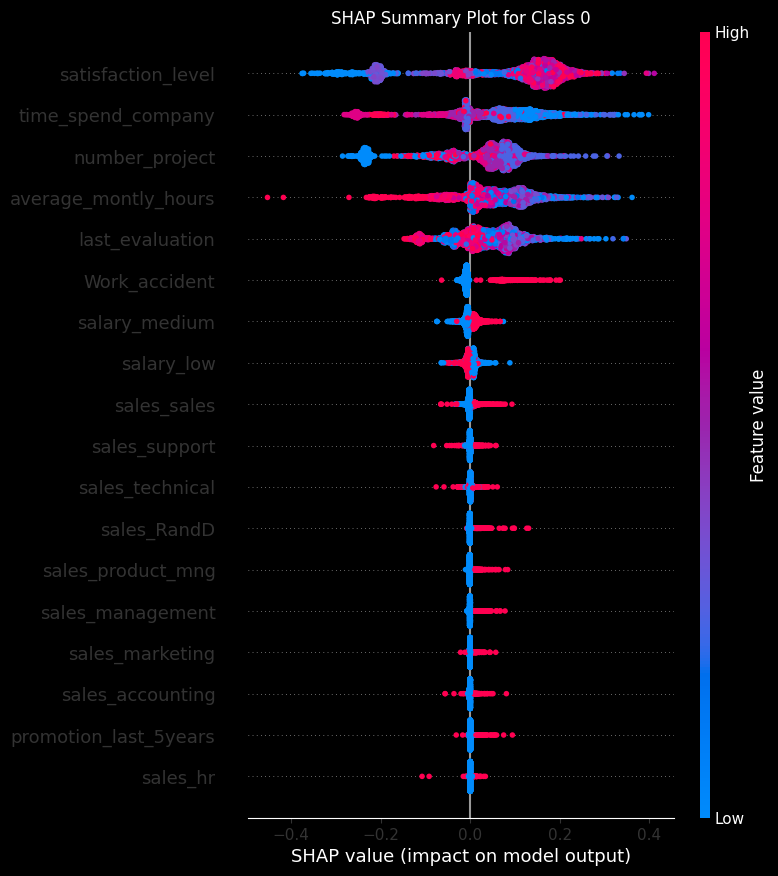

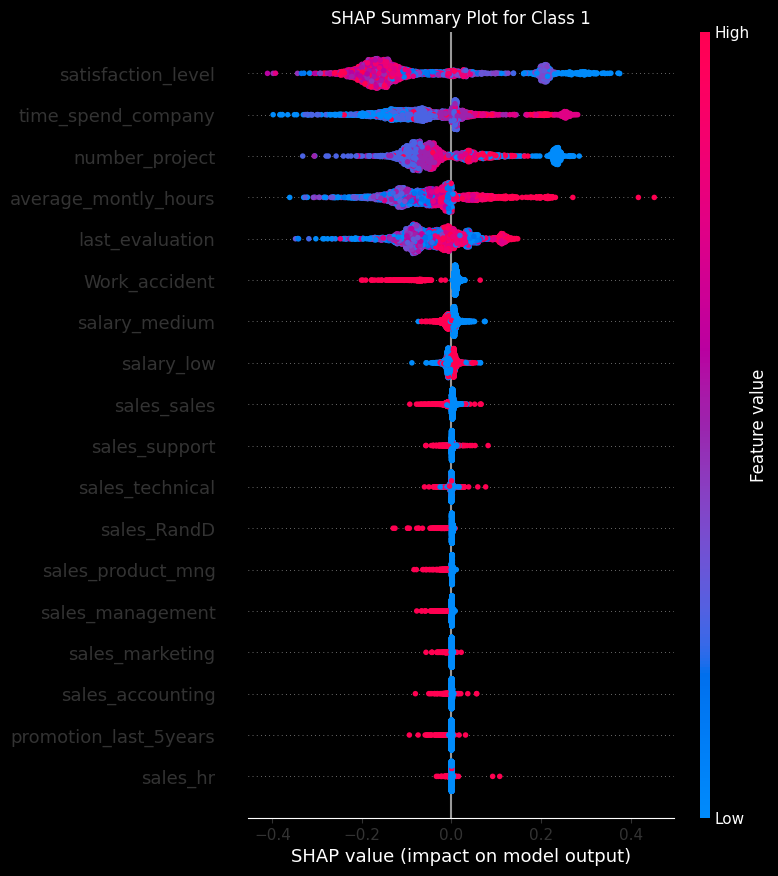

In [46]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values is an array with shape (3000, 19, 2)
for class_index in range(shap_values.shape[2]):
    shap_values_class = shap_values[:, :, class_index]
    
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values_class, X_test, show=False)
    plt.title(f'SHAP Summary Plot for Class {class_index}')
    plt.savefig(f'model_evaluations/SHAP_summaryplot_{class_index}.png', dpi=300)
    plt.show()

## Distribution of Risk Zone Categories

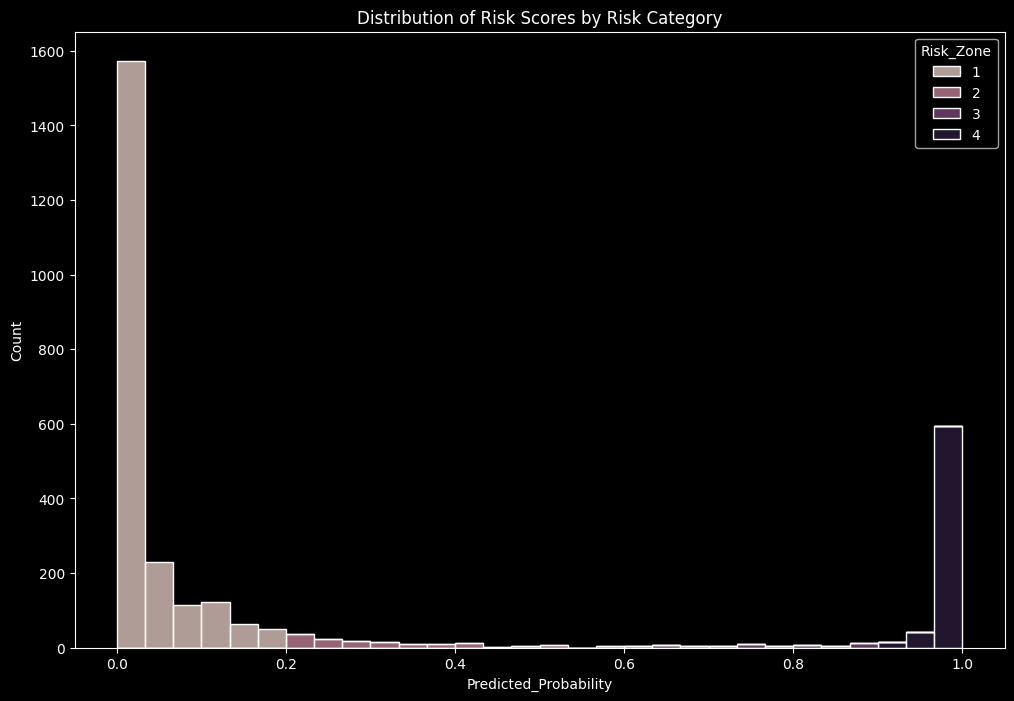

In [47]:
# Plot the distribution of predicted probabilities within each risk category
plt.figure(figsize=(12, 8))
sns.histplot(data=X_test_Risk_Zone, x='Predicted_Probability', hue='Risk_Zone', multiple='stack', bins=30)
plt.title('Distribution of Risk Scores by Risk Category')
plt.savefig('model_evaluations/distribution_risk_zone.png', dpi=300)
plt.show()

## Distribution of Top Features by Risk Zone

In [48]:
#Extract top 5 from feature importances
top5_features = feature_importances.head(5)
top5_feature_names = top5_features['Feature'].tolist()

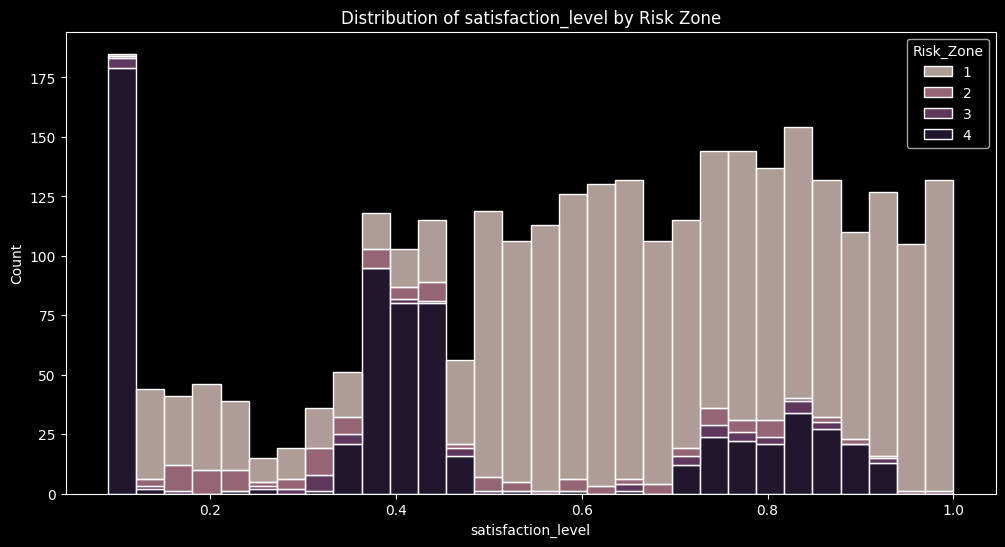

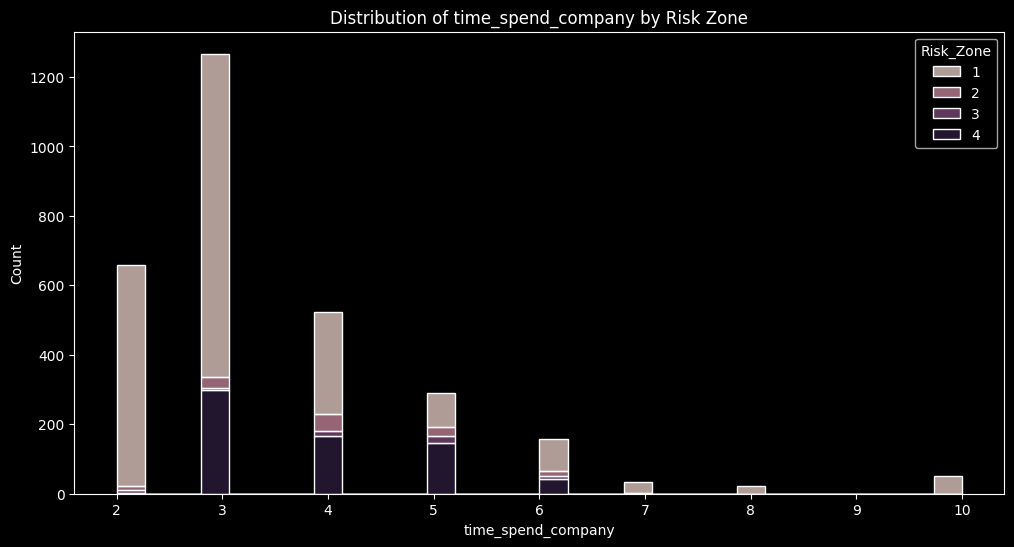

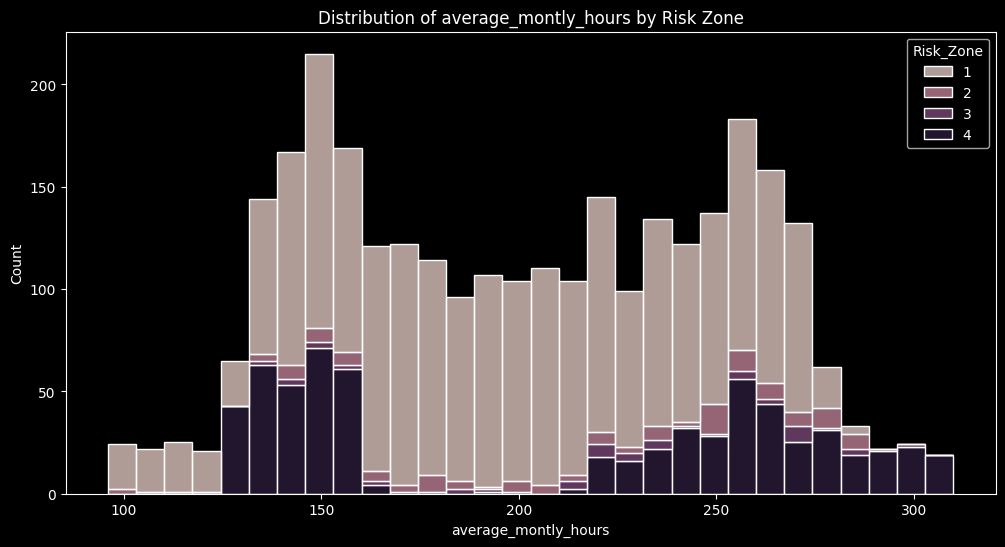

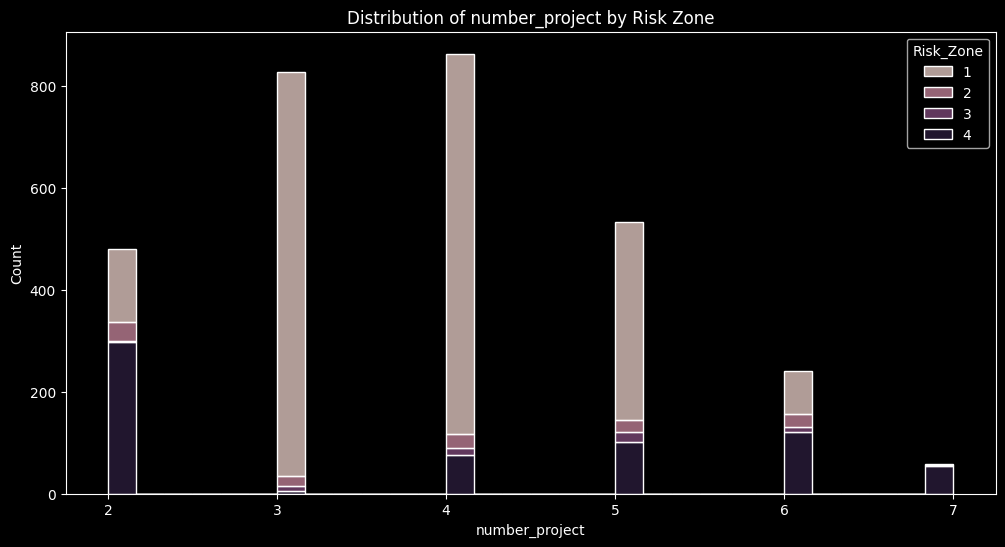

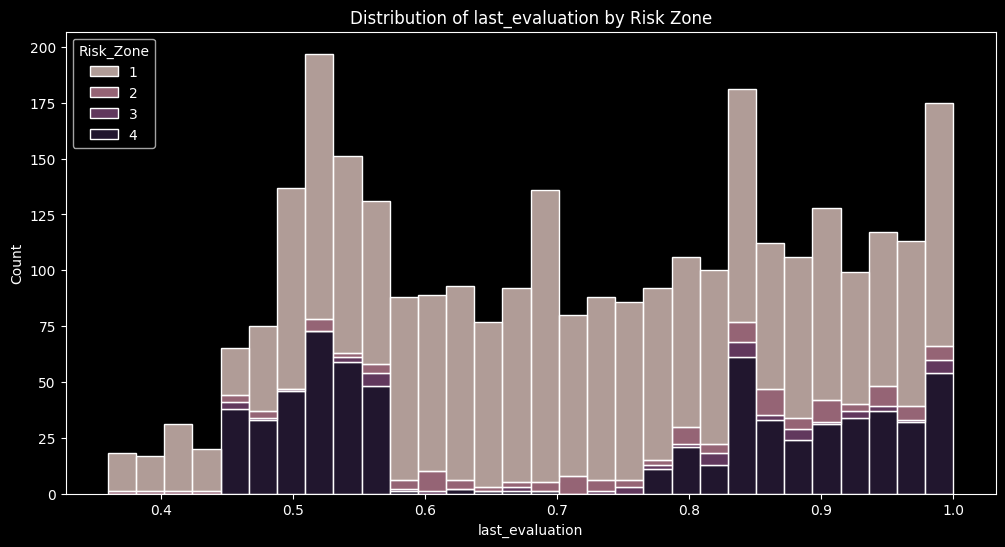

In [49]:
for feature in top5_feature_names:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', multiple='stack', bins=30)
    plt.title(f'Distribution of {feature} by Risk Zone')
    plt.savefig(f'model_evaluations/distribution_risk_zone_{feature}.png', dpi=300)
    plt.show()


## Correlation Between Important Features and Risk Zone

In [50]:
for feature in top5_feature_names:
    correlation = X_test_Risk_Zone[['Risk_Zone', feature]].corr().iloc[0, 1]
    print(f'Correlation between {feature} and Risk Zone: {correlation:.3f}')


Correlation between satisfaction_level and Risk Zone: -0.414
Correlation between time_spend_company and Risk Zone: 0.167
Correlation between average_montly_hours and Risk Zone: 0.095
Correlation between number_project and Risk Zone: 0.044
Correlation between last_evaluation and Risk Zone: 0.024


## Correlation Analaysis

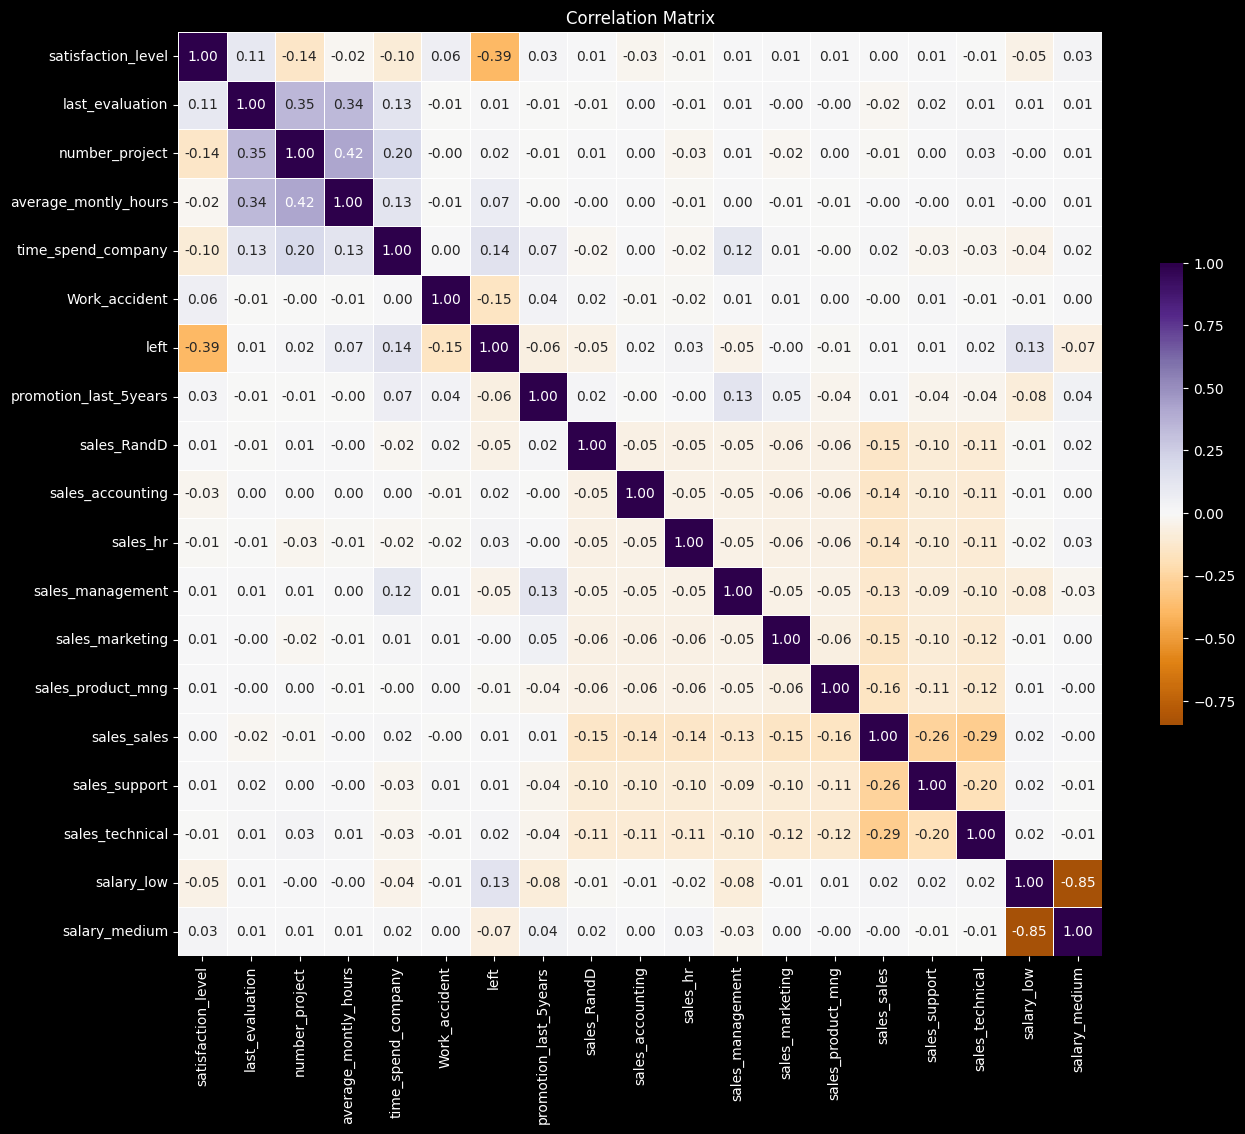

In [51]:
plt.figure(figsize=(15,12))
numerical_df = df.corr(numeric_only=True)
sns.heatmap(numerical_df, cmap='PuOr', vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

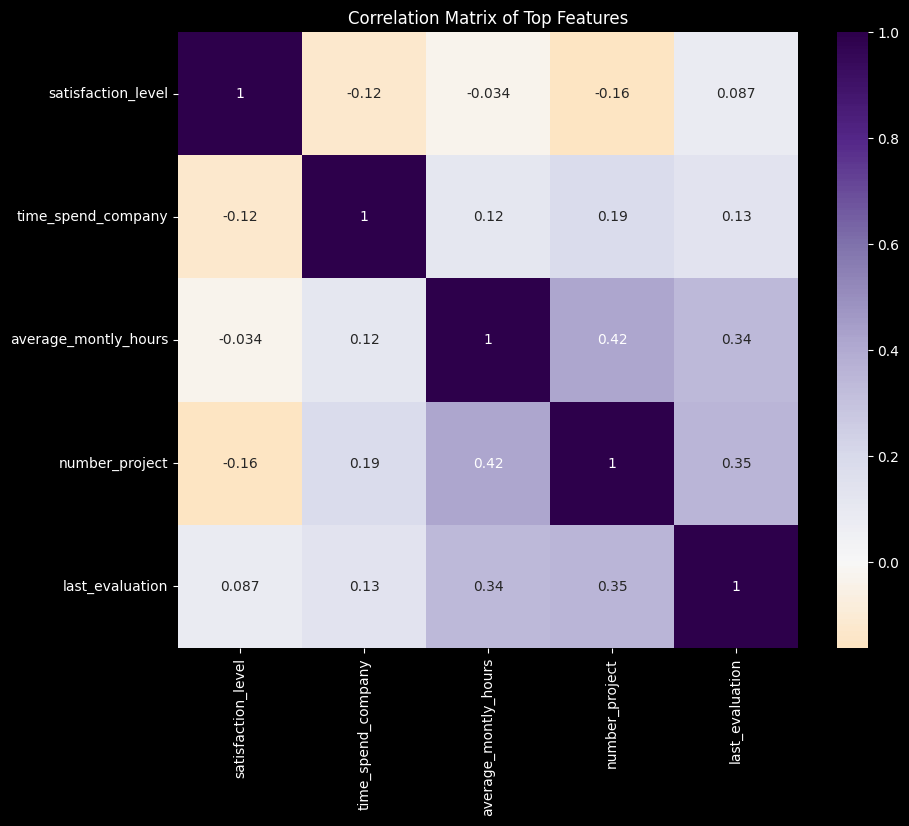

In [52]:
correlation_matrix_top_features = X_test_Risk_Zone[top5_feature_names].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top_features, annot=True, cmap='PuOr', center=0)
plt.title('Correlation Matrix of Top Features')
plt.savefig('model_evaluations/heatmap_top5.png', dpi=300)
plt.show()


## Top 5 Important Features Extraction & Descriptive Statistics

In [53]:
stats_by_risk_top5 = X_test_Risk_Zone.groupby('Risk_Zone')[top5_feature_names].describe().T
display(stats_by_risk_top5)

Risk_Zone                             1           2           3           4
satisfaction_level   count  2154.000000  136.000000   56.000000  654.000000
                     mean      0.679568    0.456838    0.550714    0.431514
                     std       0.209518    0.229927    0.255577    0.267466
                     min       0.120000    0.120000    0.090000    0.090000
                     25%       0.560000    0.247500    0.325000    0.110000
                     50%       0.690000    0.405000    0.660000    0.400000
                     75%       0.840000    0.647500    0.765000    0.720000
                     max       1.000000    0.970000    0.910000    0.920000
time_spend_company   count  2154.000000  136.000000   56.000000  654.000000
                     mean      3.330548    4.036765    4.232143    3.888379
                     std       1.583216    1.150897    1.235697    0.973502
                     min       2.000000    2.000000    2.000000    2.000000
                     25%       2.000000    3.000000    3.750000    3.000000
                     50%       3.000000    4.000000    4.500000    4.000000
                     75%       4.000000    5.000000    5.000000    5.000000
                     max      10.000000    7.000000    6.000000    6.000000
average_montly_hours count  2154.000000  136.000000   56.000000  654.000000
                     mean    198.365831  215.588235  222.946429  208.688073
                     std      45.092328   51.489297   47.564853   62.002721
                     min      96.000000   98.000000  133.000000  127.000000
                     25%     161.000000  170.250000  187.750000  146.000000
                     50%     198.000000  228.500000  227.000000  228.000000
                     75%     237.000000  260.000000  265.750000  263.000000
                     max     286.000000  287.000000  300.000000  310.000000
number_project       count  2154.000000  136.000000   56.000000  654.000000
                     mean      3.759981    3.875000    4.535714    3.856269
                     std       0.956293    1.492884    1.220496    1.856444
                     min       2.000000    2.000000    2.000000    2.000000
                     25%       3.000000    2.000000    4.000000    2.000000
                     50%       4.000000    4.000000    5.000000    4.000000
                     75%       4.000000    5.000000    5.000000    6.000000
                     max       7.000000    7.000000    7.000000    7.000000
last_evaluation      count  2154.000000  136.000000   56.000000  654.000000
                     mean      0.716184    0.759412    0.772679    0.722783
                     std       0.163159    0.162635    0.166346    0.198924
                     min       0.360000    0.380000    0.450000    0.450000
                     25%       0.580000    0.617500    0.595000    0.520000
                     50%       0.710000    0.800000    0.820000    0.800000
                     75%       0.850000    0.892500    0.890000    0.910000
                     max       1.000000    1.000000    1.000000    1.000000

In [54]:
top5_mean_values = X_test_Risk_Zone.groupby('Risk_Zone')[top5_feature_names].mean()
display(round(top5_mean_values, ndigits=3))

,satisfaction_level,time_spend_company,average_montly_hours,number_project,last_evaluation
Risk_Zone,,,,,
1,0.680,3.331,198.366,3.760,0.716
2,0.457,4.037,215.588,3.875,0.759
3,0.551,4.232,222.946,4.536,0.773
4,0.432,3.888,208.688,3.856,0.723


Pulling Indexes of Risk Zone 4 into DataFrame

In [55]:
risk_zone_4 = X_test_Risk_Zone[X_test_Risk_Zone['Risk_Zone'] == 4]
display(risk_zone_4.head())
risk_zone_4.to_csv('model_evaluations/risk_zone4_indexes_all.csv')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,Predicted_Probability,Risk_Zone
14892,0.11,0.92,6,281,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1.00,4
1246,0.43,0.49,2,155,3,0,0,0,0,0,0,0,0,1,0,0,0,1,1.00,4
14278,0.90,0.98,4,264,6,0,0,0,0,0,0,0,1,0,0,0,0,1,0.99,4
12238,0.43,0.53,2,146,3,0,0,0,0,0,0,1,0,0,0,0,1,0,1.00,4
14859,0.45,0.54,2,129,3,0,0,0,0,0,0,0,0,0,0,1,0,1,1.00,4


## Top 5 Important Features Averages by Risk Zone

C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'white'}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)
C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)


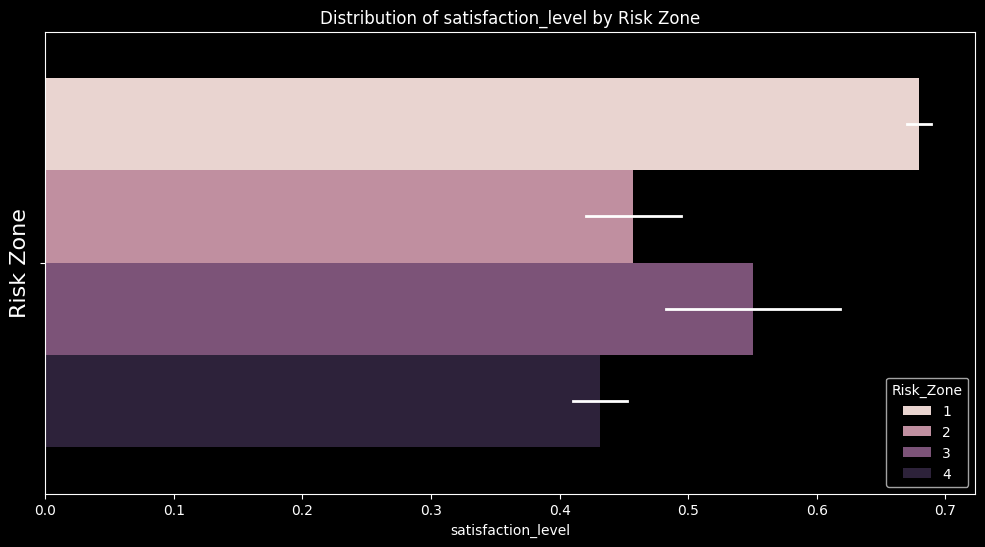

C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'white'}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)
C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)


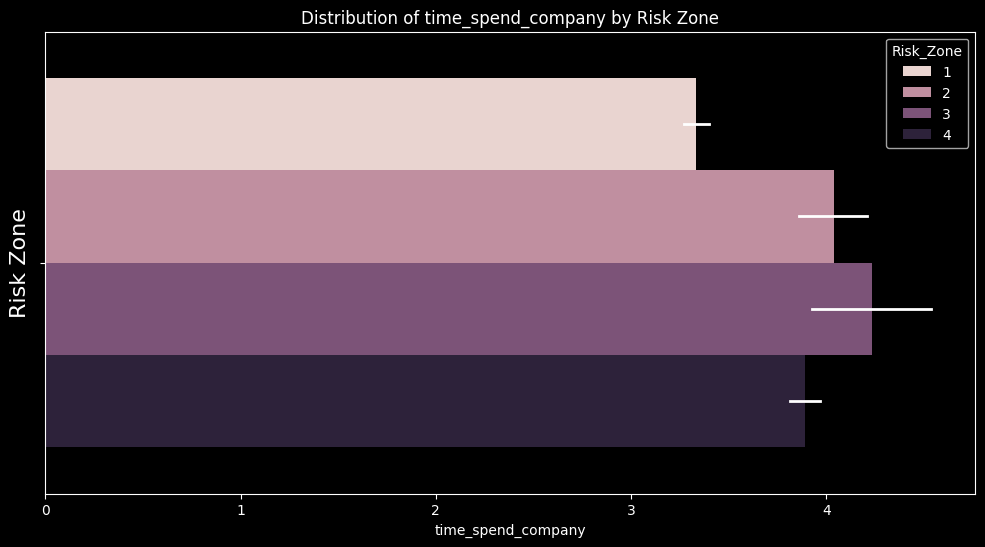

C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'white'}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)
C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)


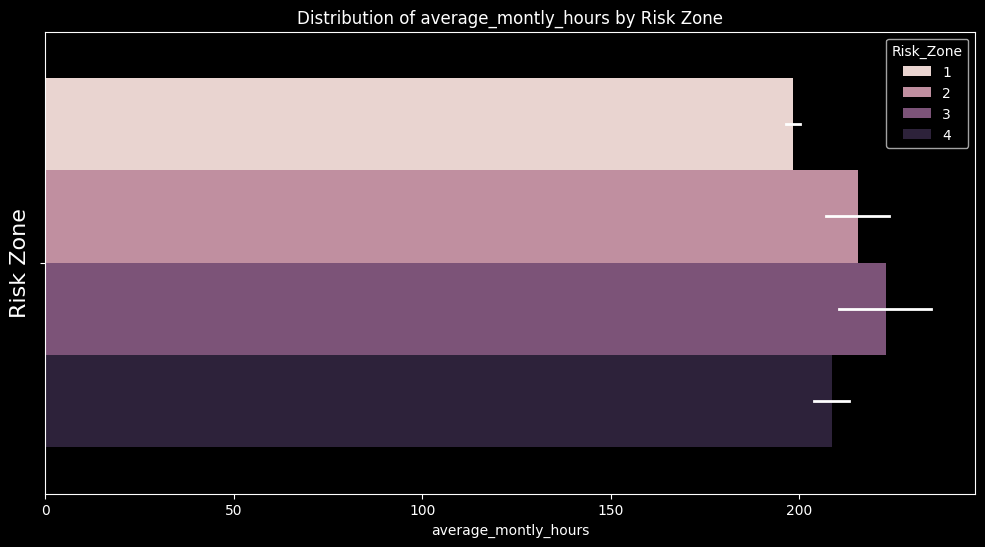

C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'white'}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)
C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)


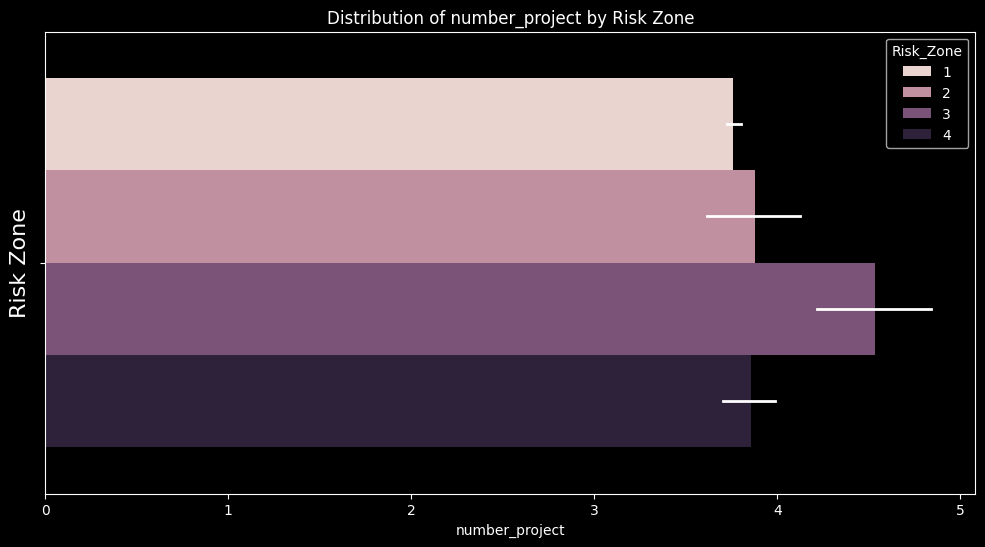

C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'white'}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)
C:\Users\003\AppData\Local\Temp\ipykernel_5384\69020011.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)


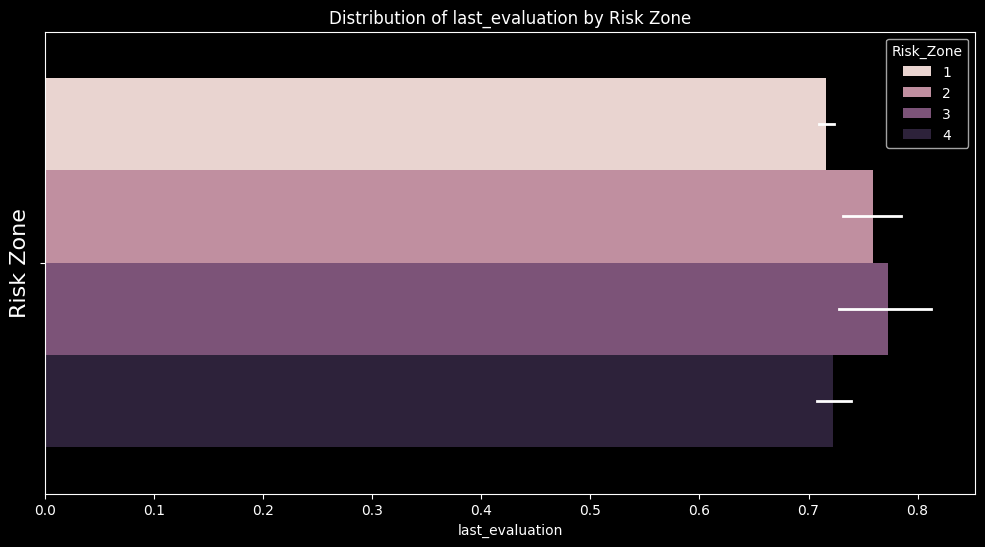

In [59]:
for feature in top5_mean_values:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=X_test_Risk_Zone, x=feature, hue='Risk_Zone', errcolor='white', errwidth=2)
    plt.title(f'Distribution of {feature} by Risk Zone')
    plt.ylabel('Risk Zone', fontsize=16)
    plt.savefig(f'model_evaluations/top5_average_by_riskzone_{feature}.png', dpi=300)
    plt.show()

## Profile Comparison: Risk Zone 1 (<20%) vs. Risk Zone 4 (>90%)

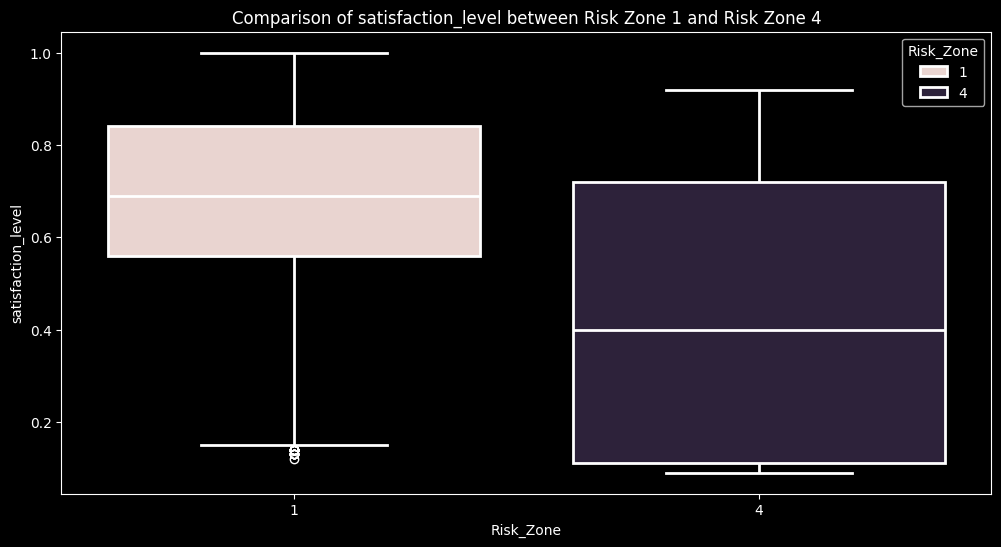

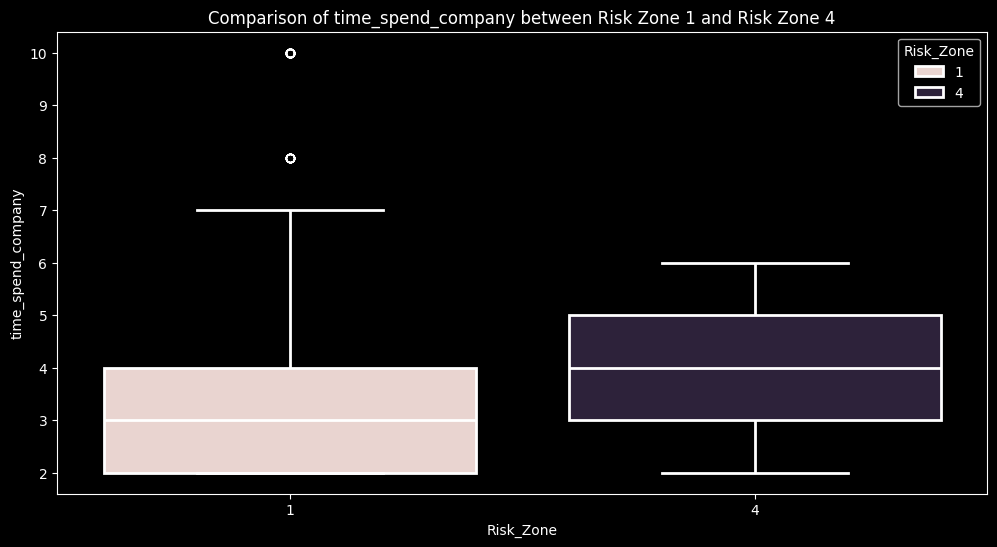

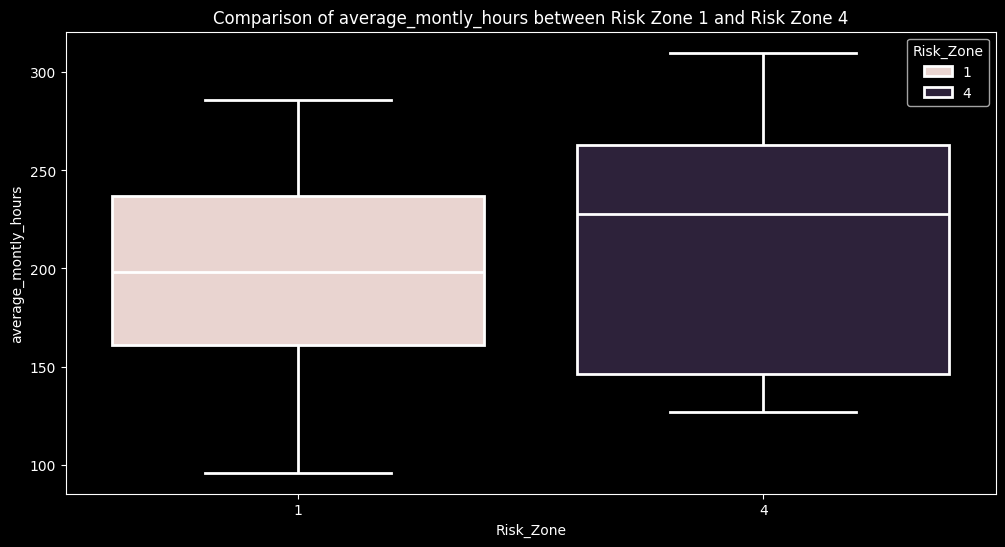

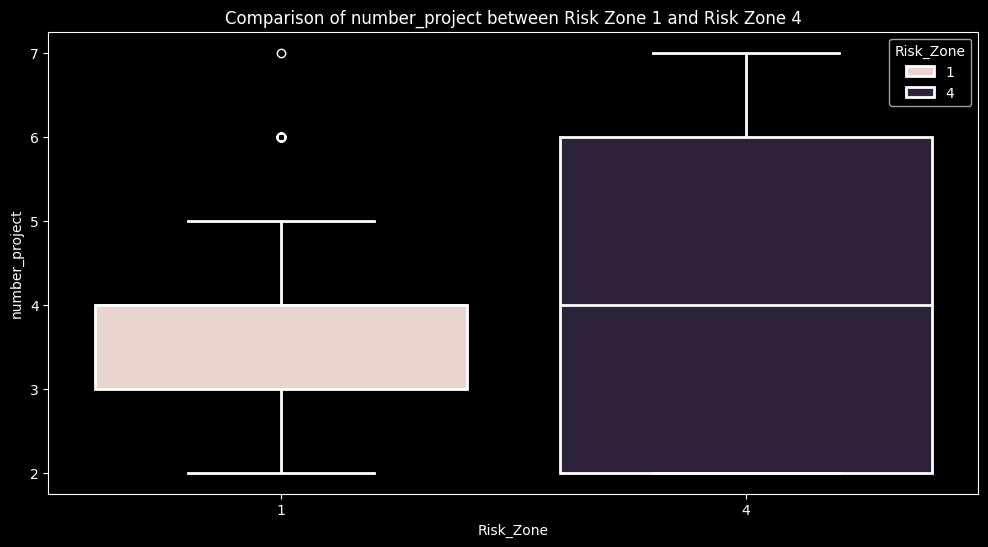

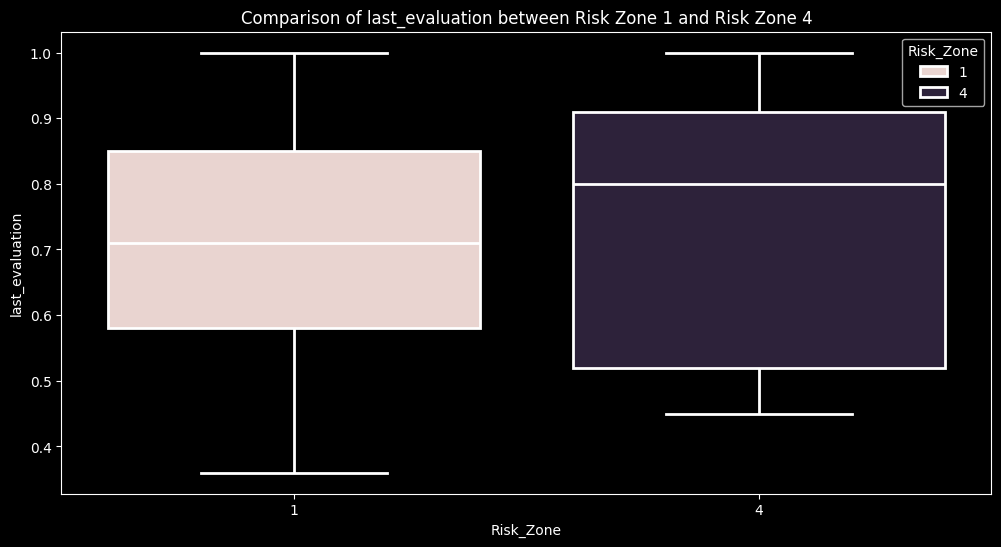

In [57]:
risk_zone_profiles = X_test_Risk_Zone[X_test_Risk_Zone['Risk_Zone'].isin([1, 4])].groupby('Risk_Zone')[top5_feature_names].mean()

for feature in top5_feature_names:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Risk_Zone', y=feature, data=X_test_Risk_Zone[X_test_Risk_Zone['Risk_Zone'].isin([1, 4])], hue='Risk_Zone', linecolor='white', linewidth=2)
    plt.title(f'Comparison of {feature} between Risk Zone 1 and Risk Zone 4')
    plt.savefig(f'model_evaluations/profile_comparison_{feature}.png', dpi=300)
    plt.show()

# <u> **Preliminary Retention Strategies** </u>

* Based on the high training and testing metrics we used a Random Forest Classifier to predict feature importances and obtained the top 5 features which contribute to 94% of explaining the prediction probabilities. 

* Evaluating the mapped risk zones (1=<20%, 2=20-60%, 3=60-80%, 4 =>90%) to the probabilities of leaving and analyzed them according to these 5 features. 

* The 3 clusters we saw in our K-means clustering analysis with Employee Satisfaction and Employee Evaluation Scores were seen again in our plotted distribution, so it is important to begin to see when these clusters begin to emerge.

> At year 2, preventative retention strategies can be enabled and continued especially through year 5 that revolve around:

>1) Check satisfaction levels: particularly for scores 0, 0.3-0.5, and 0.7-0.9 this will make the most difference in retention as time with the company extends to through year 5

>2) In regards to evaluation scores, while scores between 0.45-0.55 are of particular importance, even when evaluations were high (between 0.75-1.00) it is important addition to ensure their satisfaction is high.

>3) It is important to monitor that monthly hours are between 170 to 210 as there are particular increases in the probability of leaving when below or above those marks.

>4) The same can be said for the range of projects where 3 is the ideal, particularly below 2 and still above 4 there is an increase in the ratio of wanting to leave.